In [93]:
from numpy import array
from numpy import argmax
import numpy as np

In [94]:
text_file = open("output2.txt", "r")

In [95]:
dataset=text_file.read().splitlines()
dataset=list(filter(None,dataset))

In [96]:
# define universe of possible input values
alphabet = set('')
for l in dataset:
    alphabet=alphabet.union(set(l))
print(alphabet)
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# integer encode input data
integer_encoded = [char_to_int[char] for char in alphabet]
print(integer_encoded)

{'G', 'w', 'Г', 'у', 'С', 'к', 'k', 'i', 'n', '1', '>', 'о', 'y', '»', 'ь', '(', 'Ы', 'Б', 't', 'C', 'Ь', 'X', 'U', 'И', 'o', '{', 'У', 'T', 'П', 'I', '"', 'P', 'c', '\\', 'D', 'J', 'g', '8', 'е', 'Р', 'Ж', 'д', 'б', 'Л', 'H', 'З', 'O', 'Q', 'Д', 'й', '«', 'ъ', 'b', 'r', '3', 'Ц', 'W', '0', 'н', '.', 'j', ':', 'K', '+', '5', 'х', 'A', ')', 'п', 'Ю', 'Х', 'F', 'a', '4', 'Т', 'ш', 'B', 'з', '%', 'ц', '!', 'г', 'f', 'N', 'э', 'Э', 'с', 'ё', '<', 'E', '7', 's', 'Ф', 'e', 'M', 'V', 'ж', 'L', 'S', 'Ч', '_', '№', 'т', 'Е', 'а', 'м', 'Ш', 'О', 'Y', 'R', 'd', 'Н', 'Z', 'Щ', 'h', 'p', '2', '/', 'l', '=', 'v', 'щ', 'ю', 'В', 'x', 'ы', 'я', 'Я', 'm', 'z', 'в', '9', '*', '-', 'М', 'К', 'ф', 'Й', 'и', 'р', 'л', 'Ъ', 'u', 'ч', 'А', '6', '~'}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 

In [97]:
# one hot encode
onehot_encoded = list()
for value in integer_encoded:
	letter = [0 for _ in range(len(alphabet))]
	letter[value] = 1
	onehot_encoded.append(letter)
print(onehot_encoded)

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [98]:
print(len(onehot_encoded))

147


In [99]:
import math

def encode_word(word):
    vec=[0]*len(alphabet)
    for c in list(word):
        vec+=array(onehot_encoded[char_to_int[c]])
    return vec / np.linalg.norm(vec)

ngram_vectorize=[]

# encode n-grams
for word in dataset:
    vec = encode_word(word)
    ngram_vectorize.append(vec)

In [100]:
import skfuzzy as fuzz

In [101]:
vector_array=np.asarray(ngram_vectorize)
vector_array.shape

(11643, 147)

In [102]:
#cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
#        vector_array.T,3, 2, error=0.005, maxiter=10000, init=None)

In [103]:
#print(fpc)

In [127]:
import  sklearn
from sklearn.decomposition import PCA

num_clusters = 10

pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(ngram_vectorize)
#principalComponents = sklearn.preprocessing.normalize(principalComponents)

print(principalComponents[0])
print(np.linalg.norm(principalComponents[0]))


[-0.51781469  0.0521498  -0.00165759 -0.24205181  0.07467503  0.23478364
  0.08712622 -0.20831127  0.1089286   0.02212454]
0.6734112362369947


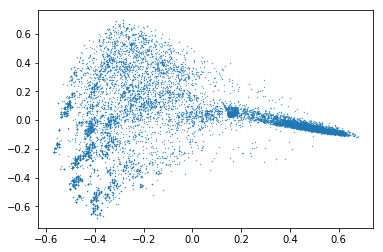

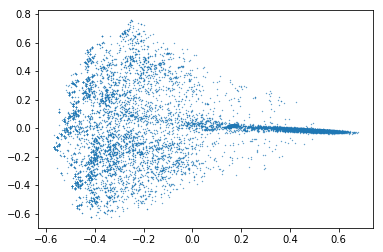

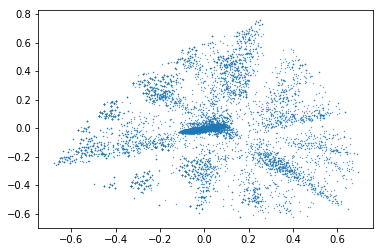

In [128]:
import matplotlib.pyplot as plt
plt.scatter(principalComponents[:,0], principalComponents[:,1], 0.1)
plt.show()
plt.scatter(principalComponents[:,0], principalComponents[:,2], 0.1)
plt.show()
plt.scatter(principalComponents[:,1], principalComponents[:,2], 0.1)
plt.show()

num_clusters = 13;

pca = PCA(n_components=13)
principalComponents = pca.fit_transform(ngram_vectorize)
vector_array=np.asarray(principalComponents)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        vector_array.T, num_clusters, 2, error=0.005, maxiter=10000, init=None)
print(fpc)

In [129]:
n_components = 10
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(ngram_vectorize)
vector_array=np.asarray(principalComponents)
#vector_array=np.asarray(ngram_vectorize)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans( vector_array.T, num_clusters, 2, error=0.005, maxiter=10000, init=None)
print(fpc)
print(u.T[0:2])

pcDict = {}
for i, w in enumerate(dataset):
    pcDict[w] = u.T[i]

print(pcDict[dataset[0]])

0.2868937980643816
[[0.13005479 0.13005412 0.13005482 0.02582036 0.13005498 0.13005335
  0.03718473 0.13005476 0.13005453 0.02661355]
 [0.05999312 0.05999374 0.05999309 0.08025832 0.05999294 0.05999447
  0.11217194 0.05999314 0.05999336 0.38761588]]
[0.13005479 0.13005412 0.13005482 0.02582036 0.13005498 0.13005335
 0.03718473 0.13005476 0.13005453 0.02661355]


In [130]:
def predict(vec):
    u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(vec.T, cntr, 2, error=0.005, maxiter=10000)
    return u

u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(vector_array.T, cntr, 2, error=0.005, maxiter=10000)



In [131]:
cluster_membership = np.argmax(u, axis=0)

In [132]:
import pandas as pd

dataframes = []
dataset_arr=np.asarray(dataset)
for i in range(num_clusters):
    words_cl=dataset_arr[cluster_membership == i]
    i_dataframe = pd.DataFrame({'#' + str(i) : words_cl})
    dataframes.append(i_dataframe)
    
pd.concat(dataframes, axis=1)

,#0,#1,#2,#3,#4,#5,#6,#7,#8,#9
0,NaN,NaN,19376,разьём.быстросоединяющий,20816,0821304023,МЕДИЦИНСКИЙ,NaN,NaN,Лампа
1,NaN,NaN,19367,высокомощная,21026,19788,ВНУТР.,NaN,NaN,Номинал
2,NaN,NaN,19763,Что,26188,26030,РТ-70,NaN,NaN,Плавкий
3,NaN,NaN,19637,контактный,20221,300,карт.уп.)STARFIX,NaN,NaN,(пластмасса)
4,NaN,NaN,19673,оцинк.Ду15,26445,19843,(1шт)BOSCH,NaN,NaN,д/вулканизации
5,NaN,NaN,NaN,источников,24270,19548,(АС),NaN,NaN,пленки
6,NaN,NaN,NaN,разрядов,21413,21300,VDW,NaN,NaN,блистере
7,NaN,NaN,NaN,открытой,37792,151-161*300,BY,NaN,NaN,стиральная
8,NaN,NaN,NaN,Быстросъемный,21312,ТМ-110Р.00(0-1Мра)G1/8,3Р+РЕ,NaN,NaN,труда
9,NaN,NaN,NaN,внутр.шестигр.5,отр.125,19136,Polly,NaN,NaN,Штуцер
